# 線形回帰 [勾配降下法による解]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

%precision 3
%matplotlib inline

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['/mnt/gold/home/yugi/.local/lib/python3.6/site-packages/numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [2]:
def mse(y, y_):
    return ((y - y_)**2).mean()

#### データ準備

In [3]:
a = 1.0
b = 3.0
X_min = 0
X_max = 20
N = 1000
mu = 0
sigma = 2

In [4]:
e = np.random.normal(0, 2, N)
X = np.random.normal(10,3,N)
y = a*X + b + e
X = X.reshape(-1,1)
X2 = np.hstack([np.ones(len(X)).reshape(-1,1),X])

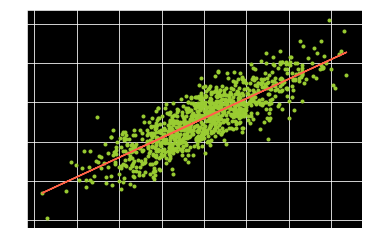

In [5]:
plt.scatter(X, y, marker=".", color="yellowgreen")
plt.plot(X, a * X + b, color="tomato")

#### a, bを総当たり的に当てはめ誤差を描画

In [6]:
a = np.arange(9).reshape(3,3)
b = a
x = np.array([1, 2, 3])

In [7]:
print(a)
print(b)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[1 2 3]


In [8]:
def calcCost(x,y, a, b):
    return np.array([np.sqrt(np.mean((y - (a2 * x + b2))**2)) for a1, b1 in zip(a,b) for a2, b2 in zip(a1, b1)]).reshape(a.shape)

In [9]:
a = np.linspace(-5, 5, 100)
b = np.linspace(-5,5, 100)
co = np.meshgrid(a,b)
error = calcCost(X,y, co[0], co[1])

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


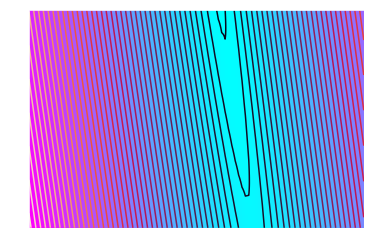

In [10]:
plt.contour(a, b, error, levels=50, color="white")
plt.pcolormesh(a, b, error, cmap = plt.get_cmap('cool'))

#### 勾配降下法

In [11]:
def gradient_decent(X, y, eta=0.00001833, n_iter=20000, verbose=True):
    
    w = np.zeros(X.shape[1])
    cost = []
    for i in range(n_iter):
        output = np.dot(X, w)
        errors = output - y
        w -= eta * X.T.dot(errors)
        cost = (errors*2).sum() / 2.0
        if verbose == True and i%1000 == 0:
            print("ITER=[{}]: ERROR:[{}]".format(i, cost))

    return w

In [12]:
gradient_decent(X2, y)

ITER=[0]: ERROR:[-12947.095907300689]
ITER=[1000]: ERROR:[-6552401761.777545]
ITER=[2000]: ERROR:[-3374909173985314.5]
ITER=[3000]: ERROR:[-1.7382957322788974e+21]
ITER=[4000]: ERROR:[-8.953343325950889e+26]
ITER=[5000]: ERROR:[-4.6115488419946694e+32]
ITER=[6000]: ERROR:[-2.375244860817858e+38]
ITER=[7000]: ERROR:[-1.2234041841787833e+44]
ITER=[8000]: ERROR:[-6.3013200135954e+49]
ITER=[9000]: ERROR:[-3.245585917330573e+55]
ITER=[10000]: ERROR:[-1.6716859204179103e+61]
ITER=[11000]: ERROR:[-8.610259865872804e+66]
ITER=[12000]: ERROR:[-4.434838748855491e+72]
ITER=[13000]: ERROR:[-2.284227774158758e+78]
ITER=[14000]: ERROR:[-1.1765245186389078e+84]
ITER=[15000]: ERROR:[-6.059859522846139e+89]
ITER=[16000]: ERROR:[-3.121218202839682e+95]
ITER=[17000]: ERROR:[-1.607628532148204e+101]
ITER=[18000]: ERROR:[-8.280323032288418e+106]
ITER=[19000]: ERROR:[-4.2649000156415006e+112]


array([-2.000e+113, -2.179e+114])

In [1]:
import torch

ImportError: numpy.core.multiarray failed to import

#### numpyによる解

In [182]:

coefficent = np.linalg.lstsq(X2,y)[0]

/mnt/gold/home/yugi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


#### scikit-learnによる解

In [183]:
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 特異値分解を使用した解法

In [184]:
U,S,V = np.linalg.svd(X2)
diag = np.diag(S)
SSinv = np.zeros(X2.T.shape)
SSinv[:diag.shape[0], :diag.shape[1]] = np.diag(1/S)
C = np.dot(np.dot(V.T, SSinv), U.T)
w = np.dot(C,y)

#### 逆行列を使用した解法

In [185]:
ATAinv = np.linalg.inv(np.dot(X2.T, X2))
ww = np.dot(np.dot(ATAinv, X2.T), y)

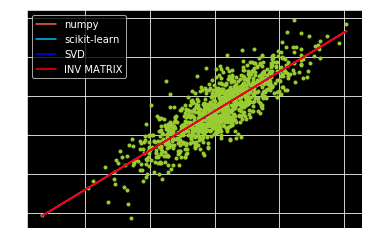

In [186]:
plt.scatter(X, y, marker='.', color="yellowgreen")
plt.plot(X, np.dot(X2, coefficent), color="tomato", label="numpy")
plt.plot(X, clf.predict(X), color="deepskyblue", label="scikit-learn")
plt.plot(X, np.dot(X2, w), color="blue", label="SVD")
plt.plot(X, np.dot(X2, ww), color="red", label="INV MATRIX")
plt.legend()

In [187]:
print("numpy: {}".format(coefficent))
print("scikit-learn: [{}, {}]".format(clf.intercept_,clf.coef_))
print("SVD: {}".format(w))
print("Inverse: {}".format(ww))

numpy: [2.99  1.007]
scikit-learn: [2.9903088171986454, [1.007]]
SVD: [2.99  1.007]
Inverse: [2.99  1.007]
